In [43]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [44]:
def extract_chrom(df, animal):
    pattern = r"^{}\.chr([^.]+)\.".format(animal)
    df['chrom'] = df['gene_id'].str.extract(pattern)
    return df
    
def extract_start_pos(df, animal):
    pattern = r"^{}\.[^.]+\.([^.]+)\.".format(animal)
    df['start'] = df['gene_id'].str.extract(pattern)
    df.astype({'start': 'int32'}).dtypes
    return df

DNMT1

In [45]:
#Tego chyba nie bedzie trzeba
rsem_m1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/1_RNA-Seq_SRR12849888.genes.results', sep = '\t')
rsem_m2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/2_RNA-Seq_SRR12849889.genes.results', sep = '\t')
rsem_m3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/3_RNA-Seq_SRR12849891.genes.results', sep = '\t')
rsem_m4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/4_RNA-Seq_SRR12849892.genes.results', sep = '\t')

In [46]:
#only keep the ERV's data
rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].str.startswith('Hsap38')]
rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].str.startswith('Hsap38')]
rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].str.startswith('Hsap38')]
rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].str.startswith('Hsap38')]

In [6]:
#print(rsem_erv_1)

In [7]:
#GET FULL!! DESEq2 data to get info about log2foldchange 
ERV_deseq = pd.read_csv('DNMT1_deseq_erv_full_results.tsv', sep = '\t')
row_names = ERV_deseq.index.tolist()
ERV_deseq['gene_id'] = row_names

In [50]:
#GET FULL!! DESEq2 data to get info about log2foldchange 
#ERV_deseq = pd.read_csv('NZM_deseq_erv_full_results.tsv', sep = '\t')
columns = ['gene_id', 'log2FoldChange']
ERV_deseq = pd.read_csv('DNMT1_ERV_diff_expr.tsv', sep = '\t', names = columns)
#row_names = ERV_deseq.index.tolist()
#ERV_deseq['gene_id'] = row_names
#ERV_deseq = ERV_deseq.drop(0)
print(ERV_deseq)

                               gene_id  log2FoldChange
0    Hsap38.chr1.161432309.161432788.-        2.295875
1    Hsap38.chr1.174844047.174847295.-       -1.967106
2    Hsap38.chr1.175103294.175103704.-        2.173519
3    Hsap38.chr1.175103876.175104337.-        1.878600
4    Hsap38.chr1.175104392.175105102.-        2.046811
..                                 ...             ...
131  Hsap38.chrX.107052509.107054017.-       -2.341143
132    Hsap38.chrX.16180209.16180451.-        5.308025
133    Hsap38.chrX.37483703.37484035.+        3.813578
134      Hsap38.chrX.4542780.4543313.-        6.086370
135      Hsap38.chrX.4894484.4895017.+        4.742436

[136 rows x 2 columns]


In [51]:
#GET THE METHYL KIT DATA
columns = ['chr', 'start', 'end', 'pr_methylated', 'num_methylated', 'num_unmethylated']
cont1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT1/1/SRR12646267_1_bismark_bt2_pe.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
cont2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT1/2/SRR12646268_1_bismark_bt2_pe.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
mut1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT1/3/SRR12646269_1_bismark_bt2_pe.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
mut2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT1/4/SRR12646270_1_bismark_bt2_pe.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)



In [52]:
def merge_by_position(s1, s2, s3, s4):
    merged_df = pd.merge(s1, s2, on=['chr', 'start', 'end'], suffixes=('_cont1', '_cont2'))
    merged_df2 = pd.merge(s3, s4, on=['chr', 'start', 'end'], suffixes=('_mut1', '_mut2'))

    merged_df = pd.merge(merged_df, merged_df2, on=['chr', 'start', 'end'])
    
    merged_df['methylation_difference'] = (merged_df['pr_methylated_cont1'] + merged_df['pr_methylated_cont2'])/2 - ( merged_df['pr_methylated_mut1'] + merged_df['pr_methylated_mut2']) / 2 
    
    return merged_df


In [53]:
merged_by_pos = merge_by_position(cont1,cont2,mut1,mut2)

In [54]:
ERV_deseq = extract_chrom(ERV_deseq, 'Hsap38')
ERV_deseq = extract_start_pos(ERV_deseq, 'Hsap38')
print(ERV_deseq)

                               gene_id  log2FoldChange chrom      start
0    Hsap38.chr1.161432309.161432788.-        2.295875     1  161432309
1    Hsap38.chr1.174844047.174847295.-       -1.967106     1  174844047
2    Hsap38.chr1.175103294.175103704.-        2.173519     1  175103294
3    Hsap38.chr1.175103876.175104337.-        1.878600     1  175103876
4    Hsap38.chr1.175104392.175105102.-        2.046811     1  175104392
..                                 ...             ...   ...        ...
131  Hsap38.chrX.107052509.107054017.-       -2.341143     X  107052509
132    Hsap38.chrX.16180209.16180451.-        5.308025     X   16180209
133    Hsap38.chrX.37483703.37484035.+        3.813578     X   37483703
134      Hsap38.chrX.4542780.4543313.-        6.086370     X    4542780
135      Hsap38.chrX.4894484.4895017.+        4.742436     X    4894484

[136 rows x 4 columns]


In [55]:
ERV_deseq = ERV_deseq.copy()
ERV_deseq['log2FoldChange'] = ERV_deseq['log2FoldChange'].astype(float)
ERV_deseq['start'] = ERV_deseq['start'].astype(int)

In [56]:
ERV_deseq.loc[:, 'prom_meth_1'] = 0
ERV_deseq.loc[:, 'prom_meth_2'] = 0
ERV_deseq.loc[:, 'prom_meth_3'] = 0
ERV_deseq.loc[:, 'prom_meth_4'] = 0


In [57]:
def get_meth_percentage(erv_row, cov_df):
    cov_df = cov_df.copy()
    # Convert 'start' column to integer in cov_df
    #cov_df['start'] = cov_df['start'].astype(int)
    #erv_row['start'] = erv_row['start'].astype(int)
    print(erv_row['start'])
    cov_df.loc[:,'is_of_intetest'] = (cov_df['chr'] == erv_row['chrom']) & (abs(cov_df['start'] - int(erv_row['start'])) <= 2000)
    cov_df = cov_df[cov_df['is_of_intetest'] == True]
    erv_row['prom_meth_1'] = cov_df['pr_methylated_cont1'].mean()
    erv_row['prom_meth_2'] = cov_df['pr_methylated_cont2'].mean()
    erv_row['prom_meth_3'] = cov_df['pr_methylated_mut1'].mean()
    erv_row['prom_meth_4'] = cov_df['pr_methylated_mut2'].mean()
    return erv_row
    

In [58]:

merged_by_pos['start'] = merged_by_pos['start'].astype(int)
#print(merged_by_pos.info())

In [59]:
ERV_deseq = ERV_deseq.apply(lambda row: get_meth_percentage(row, merged_by_pos), axis=1)

161432309
174844047
175103294
175103876
175104392
221968992
248724795
68389168
133584386
17400586
27421598
42649811
42667908
85357469
90297532
90297898
108360042
14596013
5929159
5930950
5932027
5932780
67621581
67623222
67625059
7659054
77220316
131504572
133091948
65550104
88939292
109267871
109268243
109268675
18186069
33986637
73454208
83963461
105550560
105674464
106197668
18349306
26674010
31248120
20374063
35241675
78723364
97435299
2661368
32775936
35523216
84456232
20407544
43160800
47381802
55503670
75255474
76608253
76608803
12185099
29152603
15831710
15832513
15833618
52054661
173699599
58174904
58178358
72066975
91782927
95096000
95804489
23429745
10351052
45273519
8768823
8999863
28665246
104283399
104285008
104285763
104442337
111878486
128963729
146366733
193000151
53366310
5691857
5695697
98803332
103554612
119063415
16560430
182817286
23616735
67656511
78531193
9098378
9100069
9103288
92029629
132515924
150857757
1579643
1581914
1582941
1583789
170241202
176054986
177

In [62]:
print(ERV_deseq)

melted_df = pd.melt(ERV_deseq, id_vars=[ 'log2FoldChange', 'gene_id', 'chrom', 'start'], 
                    value_vars=['prom_meth_1', 'prom_meth_2', 'prom_meth_3', 'prom_meth_4'], 
                    var_name='prom_meth_column', value_name='prom_meth_value')

#melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
#                    value_vars=['prom_meth_1', 'prom_meth_2', 'prom_meth_3', 'prom_meth_4'], 
#                    var_name='prom_meth_column', value_name='prom_meth_value')

# Extract patient ID from the prom_meth_column
patient_nr2name = {'1':'cont1','2':'cont2', '3':'mut1','4':'mut2'}
melted_df['patient_id'] = melted_df['prom_meth_column'].str[-1]
melted_df['patient_id'] = melted_df['patient_id'].map(patient_nr2name)
melted_df = melted_df.dropna()

# Display the melted dataframe
print(melted_df)

                               gene_id  log2FoldChange chrom      start  \
0    Hsap38.chr1.161432309.161432788.-        2.295875     1  161432309   
1    Hsap38.chr1.174844047.174847295.-       -1.967106     1  174844047   
2    Hsap38.chr1.175103294.175103704.-        2.173519     1  175103294   
3    Hsap38.chr1.175103876.175104337.-        1.878600     1  175103876   
4    Hsap38.chr1.175104392.175105102.-        2.046811     1  175104392   
..                                 ...             ...   ...        ...   
131  Hsap38.chrX.107052509.107054017.-       -2.341143     X  107052509   
132    Hsap38.chrX.16180209.16180451.-        5.308025     X   16180209   
133    Hsap38.chrX.37483703.37484035.+        3.813578     X   37483703   
134      Hsap38.chrX.4542780.4543313.-        6.086370     X    4542780   
135      Hsap38.chrX.4894484.4895017.+        4.742436     X    4894484   

     prom_meth_1  prom_meth_2  prom_meth_3  prom_meth_4  
0      63.744939    65.685915    18.10292

In [63]:
from scipy.stats import pearsonr, spearmanr

Pearson correlation control : -0.385 (p-value: 0.000)
Spearman correlation control : -0.399 (p-value: 0.000)
Pearson correlation mutated: -0.289 (p-value: 0.001)
Spearman correlation mutated: -0.228 (p-value: 0.008)


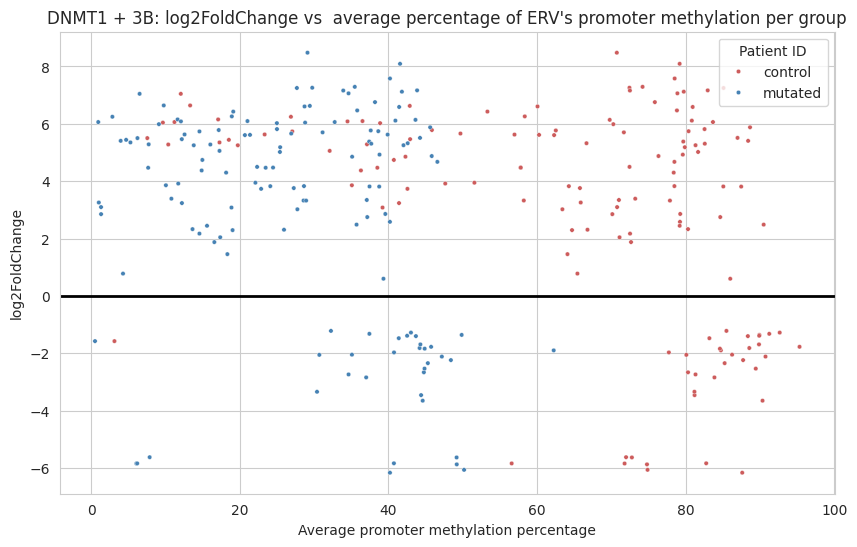

In [65]:
#DATA WITH AVERAGING WITHIN A GROUP
#Take the avg within the group
ERV_deseq['control'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'])/2
ERV_deseq['mutated'] = (ERV_deseq['prom_meth_3'] + ERV_deseq['prom_meth_4'])/2

melted_df = pd.melt(ERV_deseq, id_vars=[ 'log2FoldChange', 'gene_id', 'chrom', 'start'], 
                    value_vars=['control', 'mutated' ], 
                    var_name='group_avg', value_name='avg_meth_value')

#melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
#                    value_vars=['control', 'mutated' ], 
#                    var_name='group_avg', value_name='avg_meth_value')

melted_df = melted_df.dropna()

# Calculate Pearson and Spearman correlation
melted_df_cont = melted_df[melted_df['group_avg'] == 'control']
melted_df_mut = melted_df[melted_df['group_avg'] == 'mutated']

pearson_corr, pearson_p_value = pearsonr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])

pearson_corr2, pearson_p_value2 = pearsonr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])
spearman_corr2, spearman_p_value2 = spearmanr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

print(f"Pearson correlation mutated: {pearson_corr2:.3f} (p-value: {pearson_p_value2:.3f})")
print(f"Spearman correlation mutated: {spearman_corr2:.3f} (p-value: {spearman_p_value2:.3f})")

# PLOT 
sns.set_style("whitegrid")
palette = {'control':'indianred' , 'mutated':'steelblue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='avg_meth_value', y='log2FoldChange', hue='group_avg', palette=palette, s = 10)

# Draw horizontal line on y = 0
plt.axhline(y=0, color='black', linewidth=2)

# Add title and labels
plt.title('DNMT1 + 3B: log2FoldChange vs  average percentage of ERV\'s promoter methylation per group')
plt.xlabel('Average promoter methylation percentage')
plt.ylabel('log2FoldChange')

# Show legend
plt.legend(title='Patient ID')

# Show plot
plt.savefig('DNMT1_log2VSpromMeth_averaged.jpg', dpi=300)
plt.show()


Pearson correlation control : -0.276 (p-value: 0.001)
Spearman correlation control : -0.357 (p-value: 0.000)


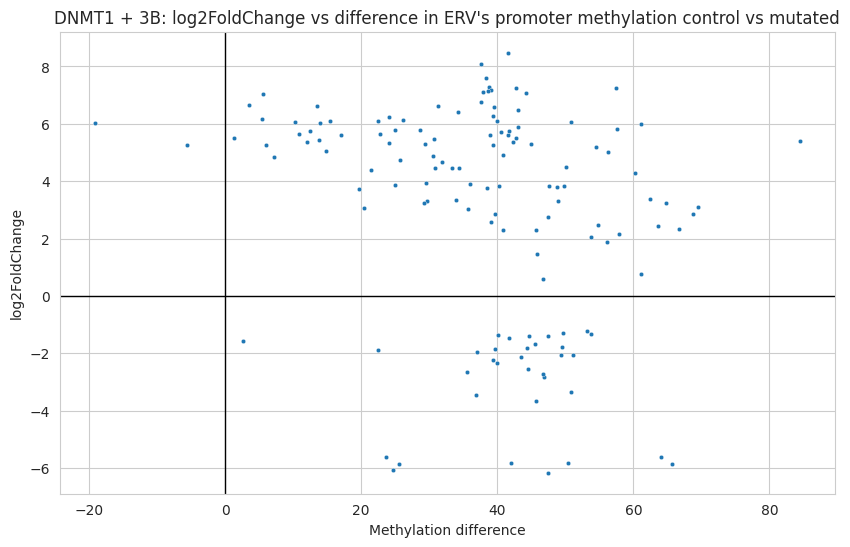

In [66]:
#try to plot log2foldchange vs mathylation difference
# Prepare the data
ERV_deseq['methylation_difference'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'])/2 - (ERV_deseq['prom_meth_3'] + ERV_deseq['prom_meth_4'] )/2
ERV_deseq = ERV_deseq.dropna()
pearson_corr, pearson_p_value = pearsonr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

#PLOT
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ERV_deseq, x='methylation_difference', y='log2FoldChange',  s = 10)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.title('DNMT1 + 3B: log2FoldChange vs difference in ERV\'s promoter methylation control vs mutated')
plt.xlabel('Methylation difference')
plt.ylabel('log2FoldChange')
plt.savefig('DNMT1_log2VSmethDiff.jpg', dpi=300)
plt.show()


TET2

In [8]:
#GET FULL!! DESEq2 data to get info about log2foldchange 
ERV_deseq = pd.read_csv('TET2_deseq_erv_full_results.tsv', sep = '\t')
row_names = ERV_deseq.index.tolist()
ERV_deseq['gene_id'] = row_names
print(ERV_deseq)

                                    baseMean  log2FoldChange     lfcSE  \
Mmus38.chr1.101889891.101890331.-   5.714114       -0.837210  1.176972   
Mmus38.chr1.10319316.10319816.+    23.261680        0.387030  0.873686   
Mmus38.chr1.10320181.10320567.+    17.319263        0.770994  1.028314   
Mmus38.chr1.10322384.10323019.+    45.459126        0.371419  0.901574   
Mmus38.chr1.126939741.126943013.+   5.340943       -2.353428  2.302832   
...                                      ...             ...       ...   
Mmus38.chrX.74874461.74876644.-     6.085715       -5.612799  3.288648   
Mmus38.chrX.92249165.92250160.+     6.790102        0.296373  1.060029   
Mmus38.chrX.9329773.9330459.-      82.824762        1.594648  0.815286   
Mmus38.chrX.9330463.9331014.-      20.680120        1.415129  1.181167   
Mmus38.chrX.9331018.9332073.-      44.469799        1.035774  1.183735   

                                       stat    pvalue      padj  \
Mmus38.chr1.101889891.101890331.- -0.711325 

In [9]:
#get full coverage data (from methylkit) 
meth_cov = pd.read_csv('meth_cov_TET2.tsv', sep = '\t')
print(meth_cov)

     chr     start       end strand  coverage1  numCs1  numTs1  coverage2  \
1      1   5037952   5037952      *         10       4       6         13   
2      1   7541406   7541406      *         36      28       8         16   
3      1   7541437   7541437      *        117     100      17         98   
4      1  12824586  12824586      *         30       0      30         34   
5      1  17468813  17468813      *         14      14       0         16   
...   ..       ...       ...    ...        ...     ...     ...        ...   
3893   Y  42374323  42374323      *         13      12       1         20   
3894   Y  42374351  42374351      *         13       0      13         20   
3895   Y  85067723  85067723      *         29       7      22         20   
3896   Y  90739336  90739336      *         23      18       5         10   
3897   Y  90808837  90808837      *         11       1      10         12   

      numCs2  numTs2  coverage3  numCs3  numTs3  coverage4  numCs4  numTs4 

In [10]:
#get full coverage data directly from bismark  

In [11]:
columns = ['chr', 'start', 'end', 'pr_methylated', 'num_methylated', 'num_unmethylated']
s1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/1_Bisulfite-Seq_SRR21658932/SRR21658932_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/2_Bisulfite-Seq_SRR21658928/SRR21658928_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s3= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/3_Bisulfite-Seq_SRR21658920/SRR21658920_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s4= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/4_Bisulfite-Seq_SRR21658916/SRR21658916_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s5= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/5_Bisulfite-Seq_SRR21658912/SRR21658912_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)


In [12]:
def merge_by_position(s1, s2, s3, s4, s5):
    merged_df = pd.merge(s1, s2, on=['chr', 'start', 'end'], suffixes=('_df1', '_df2'))
    merged_df2 = pd.merge(s3, s4, on=['chr', 'start', 'end'], suffixes=('_df3', '_df4'))

    merged_df = pd.merge(merged_df, merged_df2, on=['chr', 'start', 'end'])
    merged_df = pd.merge(merged_df, s5, on=['chr', 'start', 'end'])


    merged_df['methylation_difference'] = (merged_df['pr_methylated_df1'] + merged_df['pr_methylated_df2'])/2 - ( merged_df['pr_methylated_df3'] + merged_df['pr_methylated_df4'] + merged_df['pr_methylated']) / 3 
    
    return merged_df


In [13]:
merged_by_pos = merge_by_position(s1,s2,s3,s4,s5)

In [14]:
print(len(merged_by_pos))

1875773


In [15]:
ERV_deseq = extract_chrom(ERV_deseq, 'Mmus38')
ERV_deseq = extract_start_pos(ERV_deseq, 'Mmus38')
print(ERV_deseq)


                                    baseMean  log2FoldChange     lfcSE  \
Mmus38.chr1.101889891.101890331.-   5.714114       -0.837210  1.176972   
Mmus38.chr1.10319316.10319816.+    23.261680        0.387030  0.873686   
Mmus38.chr1.10320181.10320567.+    17.319263        0.770994  1.028314   
Mmus38.chr1.10322384.10323019.+    45.459126        0.371419  0.901574   
Mmus38.chr1.126939741.126943013.+   5.340943       -2.353428  2.302832   
...                                      ...             ...       ...   
Mmus38.chrX.74874461.74876644.-     6.085715       -5.612799  3.288648   
Mmus38.chrX.92249165.92250160.+     6.790102        0.296373  1.060029   
Mmus38.chrX.9329773.9330459.-      82.824762        1.594648  0.815286   
Mmus38.chrX.9330463.9331014.-      20.680120        1.415129  1.181167   
Mmus38.chrX.9331018.9332073.-      44.469799        1.035774  1.183735   

                                       stat    pvalue      padj  \
Mmus38.chr1.101889891.101890331.- -0.711325 

In [16]:

merged_by_pos['start'] = merged_by_pos['start'].astype(int)
print(merged_by_pos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875773 entries, 0 to 1875772
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   chr                     object 
 1   start                   int64  
 2   end                     int64  
 3   pr_methylated_df1       float64
 4   num_methylated_df1      int64  
 5   num_unmethylated_df1    int64  
 6   pr_methylated_df2       float64
 7   num_methylated_df2      int64  
 8   num_unmethylated_df2    int64  
 9   pr_methylated_df3       float64
 10  num_methylated_df3      int64  
 11  num_unmethylated_df3    int64  
 12  pr_methylated_df4       float64
 13  num_methylated_df4      int64  
 14  num_unmethylated_df4    int64  
 15  pr_methylated           float64
 16  num_methylated          int64  
 17  num_unmethylated        int64  
 18  methylation_difference  float64
dtypes: float64(6), int64(12), object(1)
memory usage: 271.9+ MB
None


In [17]:
ERV_deseq.loc[:, 'prom_meth_1'] = 0
ERV_deseq.loc[:, 'prom_meth_2'] = 0
ERV_deseq.loc[:, 'prom_meth_3'] = 0
ERV_deseq.loc[:, 'prom_meth_4'] = 0
ERV_deseq.loc[:, 'prom_meth_5'] = 0

In [18]:
def get_meth_percentage(erv_row, cov_df):
    cov_df = cov_df.copy()
    # Convert 'start' column to integer in cov_df
    #cov_df['start'] = cov_df['start'].astype(int)
    #erv_row['start'] = erv_row['start'].astype(int)
    #print(erv_row['start'])
    cov_df.loc[:,'is_of_intetest'] = (cov_df['chr'] == erv_row['chrom']) & (abs(cov_df['start'] - int(erv_row['start'])) <= 2000)
    cov_df = cov_df[cov_df['is_of_intetest'] == True]
    erv_row['prom_meth_1'] = cov_df['pr_methylated_df1'].mean()
    erv_row['prom_meth_2'] = cov_df['pr_methylated_df2'].mean()
    erv_row['prom_meth_3'] = cov_df['pr_methylated_df3'].mean()
    erv_row['prom_meth_4'] = cov_df['pr_methylated_df4'].mean()
    erv_row['prom_meth_5'] = cov_df['pr_methylated'].mean()
    return erv_row
    

In [19]:
ERV_deseq = ERV_deseq.apply(lambda row: get_meth_percentage(row, merged_by_pos), axis=1)

In [20]:
print(ERV_deseq)

                                    baseMean  log2FoldChange     lfcSE  \
Mmus38.chr1.101889891.101890331.-   5.714114       -0.837210  1.176972   
Mmus38.chr1.10319316.10319816.+    23.261680        0.387030  0.873686   
Mmus38.chr1.10320181.10320567.+    17.319263        0.770994  1.028314   
Mmus38.chr1.10322384.10323019.+    45.459126        0.371419  0.901574   
Mmus38.chr1.126939741.126943013.+   5.340943       -2.353428  2.302832   
...                                      ...             ...       ...   
Mmus38.chrX.74874461.74876644.-     6.085715       -5.612799  3.288648   
Mmus38.chrX.92249165.92250160.+     6.790102        0.296373  1.060029   
Mmus38.chrX.9329773.9330459.-      82.824762        1.594648  0.815286   
Mmus38.chrX.9330463.9331014.-      20.680120        1.415129  1.181167   
Mmus38.chrX.9331018.9332073.-      44.469799        1.035774  1.183735   

                                       stat    pvalue      padj  \
Mmus38.chr1.101889891.101890331.- -0.711325 

In [26]:
melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['prom_meth_1', 'prom_meth_2', 'prom_meth_3', 'prom_meth_4', 'prom_meth_5'], 
                    var_name='prom_meth_column', value_name='prom_meth_value')

# Extract patient ID from the prom_meth_column
patient_nr2name = {'1':'cont1','2':'cont2', '3':'mut1','4':'mut2','5':'mut3'}
melted_df['patient_id'] = melted_df['prom_meth_column'].str[-1]
melted_df['patient_id'] = melted_df['patient_id'].map(patient_nr2name)
melted_df = melted_df.dropna()

# Display the melted dataframe
print(melted_df)

       baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
0      5.714114       -0.837210  1.176972 -0.711325  0.476883  0.999811   
1     23.261680        0.387030  0.873686  0.442985  0.657777  0.999811   
2     17.319263        0.770994  1.028314  0.749765  0.453396  0.999811   
3     45.459126        0.371419  0.901574  0.411967  0.680363  0.999811   
4      5.340943       -2.353428  2.302832 -1.021971  0.306795  0.999811   
...         ...             ...       ...       ...       ...       ...   
1253   8.868428       -0.523283  1.508798 -0.346821  0.728726  0.999811   
1256   8.370808        0.136910  1.019439  0.134300  0.893166  0.999811   
1262  82.824762        1.594648  0.815286  1.955936  0.050473  0.717746   
1263  20.680120        1.415129  1.181167  1.198078  0.230887  0.999811   
1264  44.469799        1.035774  1.183735  0.875004  0.381572  0.999811   

                                gene_id chrom      start prom_meth_column  \
0     Mmus38.chr1.1018

Pearson correlation: 0.097 (p-value: 0.005)
Spearman correlation: 0.049 (p-value: 0.158)


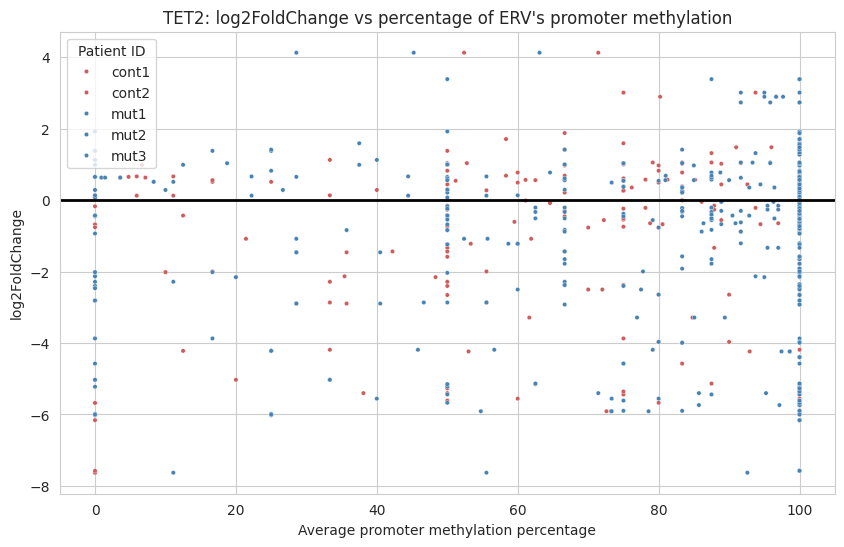

In [27]:
#FULL DATA WITHOUT AVERAGING PER GROUP

from scipy.stats import pearsonr, spearmanr

# Calculate Pearson and Spearman correlation
pearson_corr, pearson_p_value = pearsonr(melted_df['prom_meth_value'], melted_df['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(melted_df['prom_meth_value'], melted_df['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")
# Set the style
#maybe better to take the avg within a group than plot all the points
#same log2foldchange for every sample of an ERV and later it's just methylation that matters
sns.set_style("whitegrid")
palette = {'cont1':'indianred' , 'cont2':'indianred', 'mut1':'steelblue', 'mut2':'steelblue', 'mut3':'steelblue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='prom_meth_value', y='log2FoldChange', hue='patient_id', palette=palette, s = 10)

# Draw horizontal line on y = 0
plt.axhline(y=0, color='black', linewidth=2)

# Add title and labels
plt.title('TET2: log2FoldChange vs percentage of ERV\'s promoter methylation')
plt.xlabel('Average promoter methylation percentage')
plt.ylabel('log2FoldChange')

# Show legend
plt.legend(title='Patient ID')

# Show plot
plt.savefig('TET2_log2VSpromMeth.jpg', dpi=300)
plt.show()

Pearson correlation control : 0.130 (p-value: 0.095)
Spearman correlation control : 0.058 (p-value: 0.455)
Pearson correlation mutated: 0.102 (p-value: 0.190)
Spearman correlation mutated: 0.138 (p-value: 0.075)


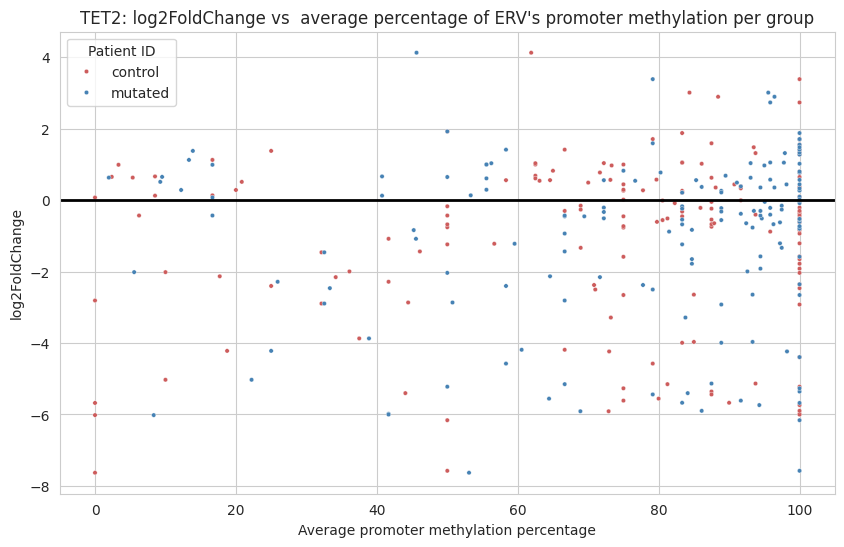

In [31]:
#DATA WITH AVERAGING WITHIN A GROUP
#Take the avg within the group
ERV_deseq['control'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'])/2
ERV_deseq['mutated'] = (ERV_deseq['prom_meth_3'] + ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'])/3

melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['control', 'mutated' ], 
                    var_name='group_avg', value_name='avg_meth_value')

melted_df = melted_df.dropna()

# Calculate Pearson and Spearman correlation
melted_df_cont = melted_df[melted_df['group_avg'] == 'control']
melted_df_mut = melted_df[melted_df['group_avg'] == 'mutated']

pearson_corr, pearson_p_value = pearsonr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])

pearson_corr2, pearson_p_value2 = pearsonr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])
spearman_corr2, spearman_p_value2 = spearmanr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

print(f"Pearson correlation mutated: {pearson_corr2:.3f} (p-value: {pearson_p_value2:.3f})")
print(f"Spearman correlation mutated: {spearman_corr2:.3f} (p-value: {spearman_p_value2:.3f})")

# PLOT 
sns.set_style("whitegrid")
palette = {'control':'indianred' , 'mutated':'steelblue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='avg_meth_value', y='log2FoldChange', hue='group_avg', palette=palette, s = 10)

# Draw horizontal line on y = 0
plt.axhline(y=0, color='black', linewidth=2)

# Add title and labels
plt.title('TET2: log2FoldChange vs  average percentage of ERV\'s promoter methylation per group')
plt.xlabel('Average promoter methylation percentage')
plt.ylabel('log2FoldChange')

# Show legend
plt.legend(title='Patient ID')

# Show plot
plt.savefig('TET2_log2VSpromMeth_averaged.jpg', dpi=300)
plt.show()


Pearson correlation control : 0.047 (p-value: 0.544)
Spearman correlation control : 0.005 (p-value: 0.952)


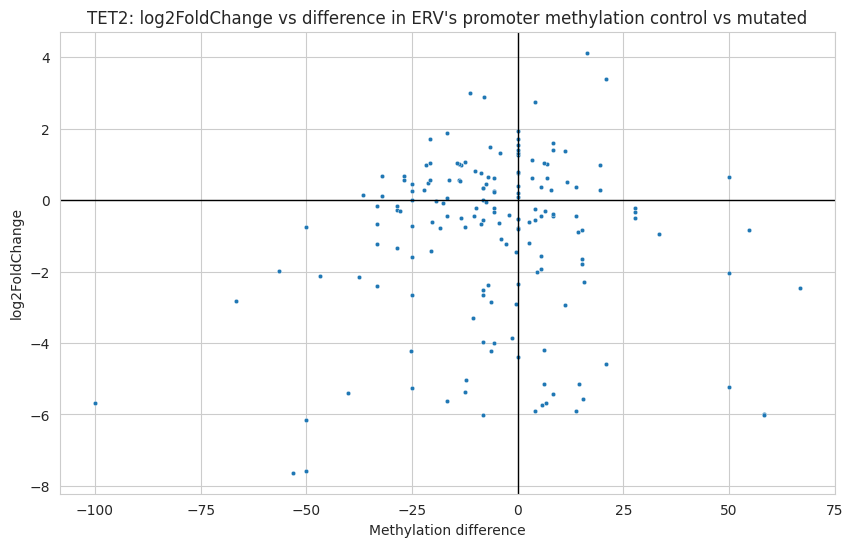

In [33]:
#try to plot log2foldchange vs mathylation difference
# Prepare the data
ERV_deseq['methylation_difference'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'])/2 - (ERV_deseq['prom_meth_3'] + ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'])/3
ERV_deseq = ERV_deseq.dropna()
pearson_corr, pearson_p_value = pearsonr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

#PLOT
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ERV_deseq, x='methylation_difference', y='log2FoldChange',  s = 10)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.title('TET2: log2FoldChange vs difference in ERV\'s promoter methylation control vs mutated')
plt.xlabel('Methylation difference')
plt.ylabel('log2FoldChange')
plt.savefig('TET2_log2VSmethDiff.jpg', dpi=300)
plt.show()


NZM

In [3]:
def read_rsem_files(directory_path, nr_of_patients):
    rsem_data = {}
    for file in os.listdir(directory_path):
        if file.endswith('.genes.results'):
            patient_id, _ , _ = file.split('_')
            rsem_data[patient_id] = pd.read_csv(os.path.join(directory_path, file), sep = '\t')
    return rsem_data
        

In [4]:
directory_path = '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM'
rsem_data = read_rsem_files(directory_path, 10)

In [5]:
rsem_s1 = rsem_data['1']
rsem_s2 = rsem_data['2']
rsem_s3 = rsem_data['3']
rsem_s4 = rsem_data['4']
rsem_s5 = rsem_data['5']
rsem_s6 = rsem_data['6']
rsem_s7 = rsem_data['7']
rsem_s8 = rsem_data['8']
rsem_s9 = rsem_data['9']

In [6]:
rsem_erv_1 = rsem_s1[rsem_s1['gene_id'].str.startswith('Hsap38')]
rsem_erv_2 = rsem_s2[rsem_s2['gene_id'].str.startswith('Hsap38')]
rsem_erv_3 = rsem_s3[rsem_s3['gene_id'].str.startswith('Hsap38')]
rsem_erv_4 = rsem_s4[rsem_s4['gene_id'].str.startswith('Hsap38')]
rsem_erv_5 = rsem_s5[rsem_s5['gene_id'].str.startswith('Hsap38')]
rsem_erv_6 = rsem_s6[rsem_s6['gene_id'].str.startswith('Hsap38')]
rsem_erv_7 = rsem_s7[rsem_s7['gene_id'].str.startswith('Hsap38')]
rsem_erv_8 = rsem_s8[rsem_s8['gene_id'].str.startswith('Hsap38')]
rsem_erv_9 = rsem_s9[rsem_s9['gene_id'].str.startswith('Hsap38')]

In [15]:
#GET FULL!! DESEq2 data to get info about log2foldchange 
#ERV_deseq = pd.read_csv('NZM_deseq_erv_full_results.tsv', sep = '\t')
columns = ['gene_id', 'log2FoldChange']
ERV_deseq = pd.read_csv('NZM_ERV_diff_expr.tsv', sep = '\t', names = columns)
#row_names = ERV_deseq.index.tolist()
#ERV_deseq['gene_id'] = row_names
ERV_deseq = ERV_deseq.drop(0)
print(ERV_deseq)

                               gene_id     log2FoldChange
1   Hsap38.chr12.127155087.127155659.+   4.82129021492646
2   Hsap38.chr12.127155953.127156498.+   3.53413145836102
3     Hsap38.chr12.65550104.65551864.-   4.96885366335979
4   Hsap38.chr14.101268159.101272007.+  -4.36535551623036
5     Hsap38.chr16.35519171.35519536.+   6.08683449607663
6     Hsap38.chr16.35520304.35520693.+   3.70991630275529
7     Hsap38.chr19.20810822.20811718.+   4.55217270820514
8    Hsap38.chr2.169251736.169254435.+  -4.30399791129557
9     Hsap38.chr22.18941587.18942399.+   23.6198162834133
10    Hsap38.chr22.18943304.18946927.+   27.9187854440887
11   Hsap38.chr3.113025711.113027561.-   8.18250696717001
12   Hsap38.chr3.148566333.148567736.-   5.12174391301113
13   Hsap38.chr3.185564943.185567849.-   23.2094513694178
14   Hsap38.chr3.185567813.185570923.-   5.69618541517831
15     Hsap38.chr4.53725643.53727496.+   6.61160456684312
16     Hsap38.chr4.53738574.53739389.+   4.43737414902499
17     Hsap38.

In [16]:
#GET THE METHYLATION DATA
columns = ['chr', 'start', 'end', 'pr_methylated', 'num_methylated', 'num_unmethylated']

s1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/1_Bisulfite-Seq_SRR12122862/SRR12122862_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/2_Bisulfite-Seq_SRR12122863/SRR12122863_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/3_Bisulfite-Seq_SRR12122864/SRR12122864_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/4_Bisulfite-Seq_SRR12122865/SRR12122865_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s5 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/5_Bisulfite-Seq_SRR12122866/SRR12122866_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s6 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/6_Bisulfite-Seq_SRR12122867/SRR12122867_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s7 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/7_Bisulfite-Seq_SRR12122868/SRR12122868_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s8 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/8_Bisulfite-Seq_SRR12122869/SRR12122869_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s9 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/NZM/9_Bisulfite-Seq_SRR12122870/SRR12122870_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)



In [17]:
def merge_by_position(s1, s2, s3, s4, s5,s6,s7,s8,s9):
    merged_df = pd.merge(s1, s2, on=['chr', 'start', 'end'], suffixes=('_df1', '_df2'))
    merged_df2 = pd.merge(s3, s4, on=['chr', 'start', 'end'], suffixes=('_df3', '_df4'))
    merged_df3 = pd.merge(s5, s6, on=['chr', 'start', 'end'], suffixes=('_df5', '_df6'))
    merged_df4 = pd.merge(s7, s8, on=['chr', 'start', 'end'], suffixes=('_df7', '_df8'))
    merged_df5 = pd.merge(merged_df4, s9, on=['chr', 'start', 'end'])
    

    merged_df = pd.merge(merged_df, merged_df2, on=['chr', 'start', 'end'])
    merged_df = pd.merge(merged_df, merged_df3, on=['chr', 'start', 'end'])
    merged_df = pd.merge(merged_df, merged_df5, on=['chr', 'start', 'end'])
    
    merged_df['methylation_difference'] = (merged_df['pr_methylated_df1'] + merged_df['pr_methylated_df2']+ merged_df['pr_methylated_df3']+ merged_df['pr_methylated_df6']+ merged_df['pr_methylated_df7'])/5 - ( merged_df['pr_methylated_df4'] + merged_df['pr_methylated_df5'] + merged_df['pr_methylated_df8']+ merged_df['pr_methylated']) / 4 
    
    return merged_df

In [28]:
merged_by_pos = merge_by_position(s1,s2,s3,s4,s5,s6,s7,s8,s9)
print(merged_by_pos)

                chr  start    end  pr_methylated_df1  num_methylated_df1  \
0                 1  10497  10497          47.899160                 114   
1                 1  10525  10525          76.954733                 187   
2                 1  10542  10542          75.308642                 183   
3                 1  10563  10563          76.954733                 187   
4                 1  10571  10571          76.543210                 186   
...             ...    ...    ...                ...                 ...   
3634685  KI270753.1  42668  42668          50.000000                   1   
3634686  KI270538.1  65954  65954          19.230769                   5   
3634687  KI270538.1  65960  65960          34.615385                   9   
3634688  KI270538.1  65963  65963          23.076923                   6   
3634689  KI270538.1  66002  66002          16.000000                   4   

         num_unmethylated_df1  pr_methylated_df2  num_methylated_df2  \
0              

In [21]:
ERV_deseq = extract_chrom(ERV_deseq, 'Hsap38')
ERV_deseq = extract_start_pos(ERV_deseq, 'Hsap38')


In [35]:
print(ERV_deseq)

                               gene_id  log2FoldChange chrom      start  \
1   Hsap38.chr12.127155087.127155659.+        4.821290    12  127155087   
2   Hsap38.chr12.127155953.127156498.+        3.534131    12  127155953   
3     Hsap38.chr12.65550104.65551864.-        4.968854    12   65550104   
4   Hsap38.chr14.101268159.101272007.+       -4.365356    14  101268159   
5     Hsap38.chr16.35519171.35519536.+        6.086834    16   35519171   
6     Hsap38.chr16.35520304.35520693.+        3.709916    16   35520304   
7     Hsap38.chr19.20810822.20811718.+        4.552173    19   20810822   
8    Hsap38.chr2.169251736.169254435.+       -4.303998     2  169251736   
9     Hsap38.chr22.18941587.18942399.+       23.619816    22   18941587   
10    Hsap38.chr22.18943304.18946927.+       27.918785    22   18943304   
11   Hsap38.chr3.113025711.113027561.-        8.182507     3  113025711   
12   Hsap38.chr3.148566333.148567736.-        5.121744     3  148566333   
13   Hsap38.chr3.18556494

In [22]:
merged_by_pos['start'] = merged_by_pos['start'].astype(int)
#print(merged_by_pos.info())

In [23]:
ERV_deseq.loc[:, 'prom_meth_1'] = 0
ERV_deseq.loc[:, 'prom_meth_2'] = 0
ERV_deseq.loc[:, 'prom_meth_3'] = 0
ERV_deseq.loc[:, 'prom_meth_4'] = 0
ERV_deseq.loc[:, 'prom_meth_5'] = 0
ERV_deseq.loc[:, 'prom_meth_6'] = 0
ERV_deseq.loc[:, 'prom_meth_7'] = 0
ERV_deseq.loc[:, 'prom_meth_8'] = 0
ERV_deseq.loc[:, 'prom_meth_9'] = 0


In [32]:
ERV_deseq = ERV_deseq.copy()
ERV_deseq['log2FoldChange'] = ERV_deseq['log2FoldChange'].astype(float)
ERV_deseq['start'] = ERV_deseq['start'].astype(int)

print(ERV_deseq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 1 to 29
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gene_id         29 non-null     object 
 1   log2FoldChange  29 non-null     float64
 2   chrom           29 non-null     object 
 3   start           29 non-null     int64  
 4   prom_meth_1     0 non-null      float64
 5   prom_meth_2     0 non-null      float64
 6   prom_meth_3     0 non-null      float64
 7   prom_meth_4     0 non-null      float64
 8   prom_meth_5     0 non-null      float64
 9   prom_meth_6     0 non-null      float64
 10  prom_meth_7     0 non-null      float64
 11  prom_meth_8     0 non-null      float64
 12  prom_meth_9     0 non-null      float64
dtypes: float64(10), int64(1), object(2)
memory usage: 3.1+ KB
None


In [31]:
print(merged_by_pos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634690 entries, 0 to 3634689
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   chr                     object 
 1   start                   int64  
 2   end                     int64  
 3   pr_methylated_df1       float64
 4   num_methylated_df1      int64  
 5   num_unmethylated_df1    int64  
 6   pr_methylated_df2       float64
 7   num_methylated_df2      int64  
 8   num_unmethylated_df2    int64  
 9   pr_methylated_df3       float64
 10  num_methylated_df3      int64  
 11  num_unmethylated_df3    int64  
 12  pr_methylated_df4       float64
 13  num_methylated_df4      int64  
 14  num_unmethylated_df4    int64  
 15  pr_methylated_df5       float64
 16  num_methylated_df5      int64  
 17  num_unmethylated_df5    int64  
 18  pr_methylated_df6       float64
 19  num_methylated_df6      int64  
 20  num_unmethylated_df6    int64  
 21  pr_methylated_df7       float64

In [41]:
def get_meth_percentage(erv_row, cov_df):
    cov_df = cov_df.copy()
    # Convert 'start' column to integer in cov_df
    #cov_df['start'] = cov_df['start'].astype(int)
    #erv_row['start'] = erv_row['start'].astype(int)
    #print(erv_row['start'])
    cov_df.loc[:,'is_of_intetest'] = (cov_df['chr'] == erv_row['chrom']) & (abs(cov_df['start'] - int(erv_row['start'])) <= 2000 )

    #
    cov_df = cov_df[cov_df['is_of_intetest'] == True]
    print(cov_df)
    erv_row['prom_meth_1'] = cov_df['pr_methylated_df1'].mean()
    erv_row['prom_meth_2'] = cov_df['pr_methylated_df2'].mean()
    erv_row['prom_meth_3'] = cov_df['pr_methylated_df3'].mean()
    erv_row['prom_meth_4'] = cov_df['pr_methylated_df4'].mean()
    erv_row['prom_meth_5'] = cov_df['pr_methylated_df5'].mean()
    erv_row['prom_meth_6'] = cov_df['pr_methylated_df6'].mean()
    erv_row['prom_meth_7'] = cov_df['pr_methylated_df7'].mean()
    erv_row['prom_meth_8'] = cov_df['pr_methylated_df8'].mean()
    erv_row['prom_meth_9'] = cov_df['pr_methylated'].mean()
    return erv_row
    

In [42]:
ERV_deseq = ERV_deseq.apply(lambda row: get_meth_percentage(row, merged_by_pos), axis=1)
print(ERV_deseq)

Empty DataFrame
Columns: [chr, start, end, pr_methylated_df1, num_methylated_df1, num_unmethylated_df1, pr_methylated_df2, num_methylated_df2, num_unmethylated_df2, pr_methylated_df3, num_methylated_df3, num_unmethylated_df3, pr_methylated_df4, num_methylated_df4, num_unmethylated_df4, pr_methylated_df5, num_methylated_df5, num_unmethylated_df5, pr_methylated_df6, num_methylated_df6, num_unmethylated_df6, pr_methylated_df7, num_methylated_df7, num_unmethylated_df7, pr_methylated_df8, num_methylated_df8, num_unmethylated_df8, pr_methylated, num_methylated, num_unmethylated, methylation_difference, is_of_intetest]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [chr, start, end, pr_methylated_df1, num_methylated_df1, num_unmethylated_df1, pr_methylated_df2, num_methylated_df2, num_unmethylated_df2, pr_methylated_df3, num_methylated_df3, num_unmethylated_df3, pr_methylated_df4, num_methylated_df4, num_unmethylated_df4, pr_methylated_df5, num_methylated_df5, num_unmethylated_df5,

KeyboardInterrupt: 

In [26]:
melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['prom_meth_1', 'prom_meth_2', 'prom_meth_3', 'prom_meth_4', 'prom_meth_5','prom_meth_6','prom_meth_7','prom_meth_8','prom_meth_9'], 
                    var_name='prom_meth_column', value_name='prom_meth_value')

# Extract patient ID from the prom_meth_column
patient_nr2name = {'1':'invasive', '2':'invasive', '3':'invasive','4':'non-invasive', '5':'non-invasive', '6':'invasive', '7':'invasive', '8':'non-invasive','9':'non-invasive'}
melted_df['patient_id'] = melted_df['prom_meth_column'].str[-1]
melted_df['patient_id'] = melted_df['patient_id'].map(patient_nr2name)
melted_df = melted_df.dropna()

# Display the melted dataframe
print(melted_df)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['baseMean', 'lfcSE', 'stat', 'pvalue', 'padj']"

In [ ]:
#DATA WITH AVERAGING WITHIN A GROUP
#Take the avg within the group
from scipy.stats import pearsonr, spearmanr

ERV_deseq['invasive'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'] + ERV_deseq['prom_meth_3']+ ERV_deseq['prom_meth_6']+ ERV_deseq['prom_meth_7'])/5
ERV_deseq['non-invasive'] = ( ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'] + ERV_deseq['prom_meth_8'] + ERV_deseq['prom_meth_9'])/4

melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['invasive', 'non-invasive' ], 
                    var_name='group_avg', value_name='avg_meth_value')

melted_df = melted_df.dropna()

# Calculate Pearson and Spearman correlation
melted_df_cont = melted_df[melted_df['group_avg'] == 'invasive']
melted_df_mut = melted_df[melted_df['group_avg'] == 'non-invasive']

pearson_corr, pearson_p_value = pearsonr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])

pearson_corr2, pearson_p_value2 = pearsonr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])
spearman_corr2, spearman_p_value2 = spearmanr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

print(f"Pearson correlation mutated: {pearson_corr2:.3f} (p-value: {pearson_p_value2:.3f})")
print(f"Spearman correlation mutated: {spearman_corr2:.3f} (p-value: {spearman_p_value2:.3f})")

# PLOT 
sns.set_style("whitegrid")
palette = {'invasive':'indianred' , 'non-invasive':'steelblue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='avg_meth_value', y='log2FoldChange', hue='group_avg', palette=palette, s = 10)

# Draw horizontal line on y = 0
plt.axhline(y=0, color='black', linewidth=2)

# Add title and labels
plt.title('NZM: log2FoldChange vs  average percentage of ERV\'s promoter methylation per group')
plt.xlabel('Average promoter methylation percentage')
plt.ylabel('log2FoldChange')

# Show legend
plt.legend(title='Patient ID')

# Show plot
plt.savefig('NZM_log2VSpromMeth_averaged.jpg', dpi=300)
plt.show()


In [ ]:
#try to plot log2foldchange vs mathylation difference
# Prepare the data
ERV_deseq['methylation_difference'] = ( ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'] + ERV_deseq['prom_meth_8'] + ERV_deseq['prom_meth_9'])/4 - (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'] + ERV_deseq['prom_meth_3']+ ERV_deseq['prom_meth_6']+ ERV_deseq['prom_meth_7'])/5 
ERV_deseq = ERV_deseq.dropna()
pearson_corr, pearson_p_value = pearsonr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

#PLOT
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ERV_deseq, x='methylation_difference', y='log2FoldChange',  s = 10)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.title('NZM: log2FoldChange vs difference in ERV\'s promoter methylation non-invasive - invasive')
plt.xlabel('Methylation difference')
plt.ylabel('log2FoldChange')
plt.savefig('NZM_log2VSmethDiff.jpg', dpi=300)
plt.show()



DNMT3A

In [3]:
rsem_mut1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A/1_RNA-Seq_SRR2297229.genes.results', sep = '\t')
rsem_mut2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A/2_RNA-Seq_SRR2297230.genes.results', sep = '\t')

rsem_cont1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A/3_RNA-Seq_SRR2297231.genes.results', sep = '\t')
rsem_cont2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A/4_RNA-Seq_SRR2297232.genes.results', sep = '\t')
rsem_cont3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A/6_RNA-Seq_SRR2297234.genes.results', sep = '\t')

In [4]:
rsem_mut1 = rsem_mut1[rsem_mut1['gene_id'].str.startswith('Mmus38')]
rsem_mut2 = rsem_mut2[rsem_mut2['gene_id'].str.startswith('Mmus38')]

rsem_cont1 = rsem_cont1[rsem_cont1['gene_id'].str.startswith('Mmus38')]
rsem_cont2 = rsem_cont2[rsem_cont2['gene_id'].str.startswith('Mmus38')]
rsem_cont3 = rsem_cont3[rsem_cont3['gene_id'].str.startswith('Mmus38')]

In [5]:
#remember to upload the file!
ERV_deseq = pd.read_csv('DNMT3A_deseq_erv_full_results.tsv', sep = '\t')
row_names = ERV_deseq.index.tolist()
ERV_deseq['gene_id'] = row_names

In [6]:
columns = ['chr', 'start', 'end', 'pr_methylated', 'num_methylated', 'num_unmethylated']

bism_cont1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT3A/3_Bisulfite-Seq_SRR4238587/SRR4238587.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
bism_cont2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT3A/4_Bisulfite-Seq_SRR4238588/SRR4238588.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
bism_cont3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT3A/6_Bisulfite-Seq_SRR4238590/SRR4238590.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)

bism_mut1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT3A/1_Bisulfite-Seq_SRR4238585/SRR4238585.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
bism_mut2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/DNMT3A/2_Bisulfite-Seq_SRR4238586/SRR4238586.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)

In [7]:
def merge_by_position(s1, s2, s3, s4, s5):
    merged_df = pd.merge(s1, s2, on=['chr', 'start', 'end'], suffixes=('_cont1', '_cont2'))
    merged_df2 = pd.merge(s3, s4, on=['chr', 'start', 'end'], suffixes=('_cont3', '_mut1'))

    merged_df = pd.merge(merged_df, merged_df2, on=['chr', 'start', 'end'])
    merged_df = pd.merge(merged_df, s5, on=['chr', 'start', 'end'])


    merged_df['methylation_difference'] = (merged_df['pr_methylated_cont1'] + merged_df['pr_methylated_cont2']+ merged_df['pr_methylated_cont3'])/3 - ( merged_df['pr_methylated_mut1'] + merged_df['pr_methylated']) / 2 
    
    return merged_df

In [8]:
merged_by_pos = merge_by_position(bism_cont1, bism_cont2, bism_cont3, bism_mut1, bism_mut2)

In [9]:
ERV_deseq = extract_chrom(ERV_deseq, 'Mmus38')
ERV_deseq = extract_start_pos(ERV_deseq, 'Mmus38')

In [10]:
merged_by_pos['start'] = merged_by_pos['start'].astype(int)

In [14]:
ERV_deseq.loc[:, 'prom_meth_1'] = 0
ERV_deseq.loc[:, 'prom_meth_2'] = 0
ERV_deseq.loc[:, 'prom_meth_3'] = 0
ERV_deseq.loc[:, 'prom_meth_4'] = 0
ERV_deseq.loc[:, 'prom_meth_5'] = 0
print(ERV_deseq)

                                     baseMean  log2FoldChange     lfcSE  \
Mmus38.chr1.100224565.100226208.-    9.807222       -0.133472  1.478395   
Mmus38.chr1.100226257.100228893.-   20.231863       -2.352118  3.308341   
Mmus38.chr1.100982895.100984775.-    5.740753       -1.093115  1.543300   
Mmus38.chr1.101759052.101762951.-    3.316878        1.186837  1.965915   
Mmus38.chr1.101889891.101890331.-   73.324251        0.129356  0.539107   
...                                       ...             ...       ...   
Mmus38.chrY.89127216.89130788.+      5.258112       -0.006960  1.449614   
Mmus38.chrY.90797079.90797636.-    206.332857       -0.216993  1.265756   
Mmus38.chrY.90806892.90807272.-     82.311056       -0.216148  0.834700   
Mmus38.chrY.90809563.90810348.-    122.458082        0.035601  1.669072   
Mmus38.chrY.987019.988002.-          3.613994       -0.961035  1.930118   

                                       stat    pvalue      padj  \
Mmus38.chr1.100224565.100226208.

In [17]:
def get_meth_percentage(erv_row, cov_df):
    cov_df = cov_df.copy()
    # Convert 'start' column to integer in cov_df
    #cov_df['start'] = cov_df['start'].astype(int)
    #erv_row['start'] = erv_row['start'].astype(int)
    #print(erv_row['start'])
    #print('xxx')
    cov_df.loc[:,'is_of_intetest'] = (cov_df['chr'] == erv_row['chrom']) & (abs(cov_df['start'] - int(erv_row['start'])) <= 2000)
    cov_df = cov_df[cov_df['is_of_intetest'] == True]
    erv_row['prom_meth_1'] = cov_df['pr_methylated_cont1'].mean()
    erv_row['prom_meth_2'] = cov_df['pr_methylated_cont2'].mean()
    erv_row['prom_meth_3'] = cov_df['pr_methylated_cont3'].mean()
    erv_row['prom_meth_4'] = cov_df['pr_methylated_mut1'].mean()
    erv_row['prom_meth_5'] = cov_df['pr_methylated'].mean()

    return erv_row

In [18]:
ERV_deseq = ERV_deseq.apply(lambda row: get_meth_percentage(row, merged_by_pos), axis=1)

xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx
xxx


In [19]:
melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['prom_meth_1', 'prom_meth_2', 'prom_meth_3', 'prom_meth_4', 'prom_meth_5'], 
                    var_name='prom_meth_column', value_name='prom_meth_value')

# Extract patient ID from the prom_meth_column
patient_nr2name = {'1':'control_1', '2':'control_2', '3':'control_3','4':'mutated_1', '5':'mutated_2'}
melted_df['patient_id'] = melted_df['prom_meth_column'].str[-1]
melted_df['patient_id'] = melted_df['patient_id'].map(patient_nr2name)
melted_df = melted_df.dropna()

# Display the melted dataframe
print(melted_df)

         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
5       16.883833        0.927437  0.854635  1.085186  0.277839  0.999966   
7      103.633261        0.217342  0.501126  0.433708  0.664501  0.999966   
10       6.556263        1.038323  1.286459  0.807117  0.419599  0.999966   
13      34.510746       -0.512013  0.702807 -0.728526  0.466292  0.999966   
14       7.658198        0.217993  1.646062  0.132433  0.894642  0.999966   
...           ...             ...       ...       ...       ...       ...   
16876    3.645756       -0.349735  2.036198 -0.171759  0.863627  0.999966   
16896    3.405509        1.108797  1.716164  0.646090  0.518221  0.999966   
16898    3.447382       -0.490187  1.723508 -0.284413  0.776094  0.999966   
16900    5.258112       -0.006960  1.449614 -0.004801  0.996169  0.999966   
16902   82.311056       -0.216148  0.834700 -0.258953  0.795672  0.999966   

                                 gene_id chrom      start prom_meth_column 

Pearson correlation control : 0.047 (p-value: 0.169)
Spearman correlation control : 0.030 (p-value: 0.386)
Pearson correlation mutated: 0.049 (p-value: 0.148)
Spearman correlation mutated: 0.037 (p-value: 0.275)


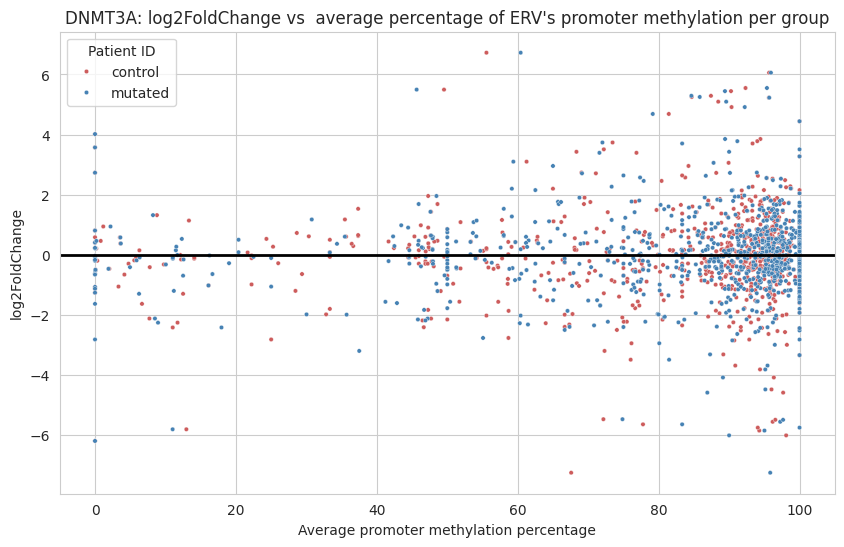

In [21]:
#DATA WITH AVERAGING WITHIN A GROUP
#Take the avg within the group
from scipy.stats import pearsonr, spearmanr

ERV_deseq['control'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'] + ERV_deseq['prom_meth_3'])/3
ERV_deseq['mutated'] = ( ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'])/2

melted_df = pd.melt(ERV_deseq, id_vars=['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'gene_id', 'chrom', 'start'], 
                    value_vars=['control', 'mutated' ], 
                    var_name='group_avg', value_name='avg_meth_value')

melted_df = melted_df.dropna()

# Calculate Pearson and Spearman correlation
melted_df_cont = melted_df[melted_df['group_avg'] == 'control']
melted_df_mut = melted_df[melted_df['group_avg'] == 'mutated']

pearson_corr, pearson_p_value = pearsonr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(melted_df_cont['avg_meth_value'], melted_df_cont['log2FoldChange'])

pearson_corr2, pearson_p_value2 = pearsonr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])
spearman_corr2, spearman_p_value2 = spearmanr(melted_df_mut['avg_meth_value'], melted_df_mut['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

print(f"Pearson correlation mutated: {pearson_corr2:.3f} (p-value: {pearson_p_value2:.3f})")
print(f"Spearman correlation mutated: {spearman_corr2:.3f} (p-value: {spearman_p_value2:.3f})")

# PLOT 
sns.set_style("whitegrid")
palette = {'control':'indianred' , 'mutated':'steelblue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=melted_df, x='avg_meth_value', y='log2FoldChange', hue='group_avg', palette=palette, s = 10)

# Draw horizontal line on y = 0
plt.axhline(y=0, color='black', linewidth=2)

# Add title and labels
plt.title('DNMT3A: log2FoldChange vs  average percentage of ERV\'s promoter methylation per group')
plt.xlabel('Average promoter methylation percentage')
plt.ylabel('log2FoldChange')

# Show legend
plt.legend(title='Patient ID')

# Show plot
plt.savefig('DNMT3A_log2VSpromMeth_averaged.jpg', dpi=300)
plt.show()


Pearson correlation control : -0.007 (p-value: 0.830)
Spearman correlation control : -0.034 (p-value: 0.313)


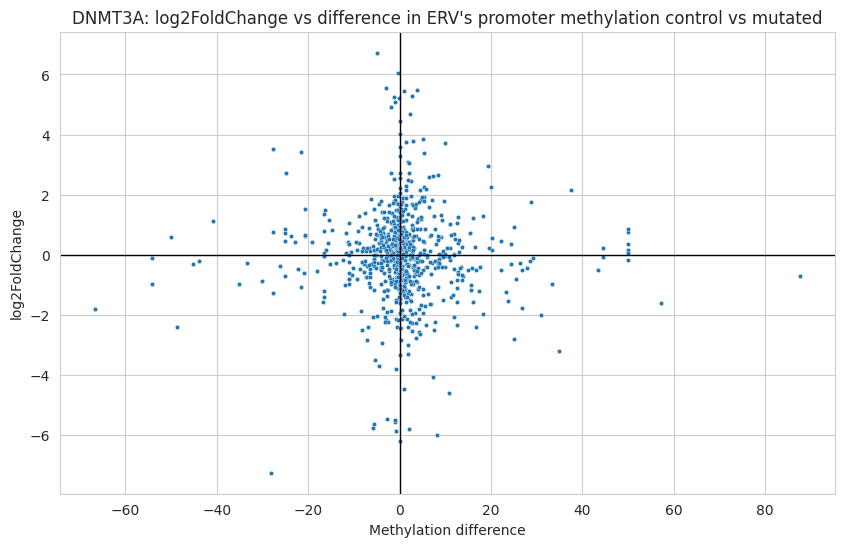

In [22]:
#PLOT METHYLATION DIFFERENCE
#try to plot log2foldchange vs mathylation difference
# Prepare the data
ERV_deseq['methylation_difference'] = (ERV_deseq['prom_meth_1'] + ERV_deseq['prom_meth_2'] + ERV_deseq['prom_meth_3'])/3 - (ERV_deseq['prom_meth_4'] + ERV_deseq['prom_meth_5'])/2
ERV_deseq = ERV_deseq.dropna()
pearson_corr, pearson_p_value = pearsonr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])
spearman_corr, spearman_p_value = spearmanr(ERV_deseq['methylation_difference'], ERV_deseq['log2FoldChange'])

# Print correlation results
print(f"Pearson correlation control : {pearson_corr:.3f} (p-value: {pearson_p_value:.3f})")
print(f"Spearman correlation control : {spearman_corr:.3f} (p-value: {spearman_p_value:.3f})")

#PLOT
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ERV_deseq, x='methylation_difference', y='log2FoldChange',  s = 10)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.title('DNMT3A: log2FoldChange vs difference in ERV\'s promoter methylation control vs mutated')
plt.xlabel('Methylation difference')
plt.ylabel('log2FoldChange')
plt.savefig('DNMT3A_log2VSmethDiff.jpg', dpi=300)
plt.show()
